<h1 style="text-align: center;"> Data Science/Machine Learning Code Walkthrough</h1>
<br/>

<img style="max-height: 80px; position: relative; left: -30px" src="./img/wharton-logo.png" alt="Wharton School logo"/>
<br/>

<h3 style="text-align: center; margin: 5px;">Fall 2018, OIDD314/662 </h3>
<h3 style="text-align: center; margin: 5px;">Alex P. Miller, Kartik Hosanagar</h3>

<h4 style="text-align: center; margin: 5px;">{alexmill,kartikh}@wharton.upenn.edu</h4>
<h4 style="text-align: center; margin: 5px;"><a href="https://twitter.com/alexpmil">@alexpmil</a>, <a href="https://twitter.com/khosanagar">@KHosanagar</a></h4>


---

Main goals:
- Understand basics of working with raw data in ML
- Understand what "machine learning" looks like in practice
- Get a sense of where fancy methods help and where they don't
- Give you a jumping off point if you want to learn more

(I will be walking through the code for illustrative purposes, but I can't teach you how to program in 20 minutes!)

In [1]:
# Import basic functions

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from copy import deepcopy

pd.set_option('display.max_columns', 50)

# Dataset: Online Dating Profiles

This is a useful, publicly available dataset for demonstrating some common data science techniques ([data source](https://github.com/rudeboybert/JSE_OkCupid)). We'll build some toy examples here, but the methods/principles are easily generalizable to other datasets.

# Part 1: Basic Data Processing and Prediction


In [2]:
# Load in raw profiles
dating_data = pd.read_csv("./dating_data/profiles_sample.csv", index_col=0)
dating_data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
53518,62,thin,NaN,socially,never,graduated from space camp,i'm a very lighthearted person. i prefer laugh...,i'm making a point of not dwelling on what i m...,making friends out of strangers. i seem to be ...,my smile.,i prefer books that are about true events and ...,1. my family<br />\n2. food<br />\n3. my compu...,just what to think about.,NaN,it's not very private if you plan on admitting...,if you have read my profile and think we may b...,NaN,64.0,-1,retired,2012-05-25-22-35,"hayward, california",has kids,straight,has dogs,christianity,f,leo but it doesn&rsquo;t matter,sometimes,english,single
24790,27,curvy,mostly vegetarian,socially,NaN,graduated from college/university,"i love to travel, check out coffee shops, sals...",meeting people! making the most out of life......,"having an open mind, hosting parties, going wi...",my smile :-),"books- eat pray love, kite runner, homage to c...",music<br />\nphone<br />\ninternet<br />\nhot ...,"what i want to be when i grow up, the world we...",maybe perusing the streets of the city with my...,i like it when it's foggy and raining outside,you define success as happiness.<br />\n<br />...,other,67.0,-1,banking / financial / real estate,2012-06-25-22-29,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and has cats,agnosticism and somewhat serious about it,f,pisces,no,"english (fluently), spanish (poorly), tagalog ...",single
21691,28,average,NaN,socially,never,graduated from college/university,NaN,working as marketing consultant helping compan...,NaN,my eyes,NaN,"good food, friends, family, books, travel and ...",everything,going to dinner with friends,NaN,you think we have a lot in common and want to ...,white,66.0,60000,sales / marketing / biz dev,2012-06-29-13-31,"san francisco, california",NaN,straight,likes dogs,NaN,f,aries and it&rsquo;s fun to think about,no,english,single
18310,33,athletic,NaN,socially,never,graduated from college/university,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,you are cool - no pressure - like to sing - li...,white,71.0,-1,NaN,2011-10-12-09-49,"san francisco, california",NaN,straight,NaN,other,m,scorpio,no,english,single
36621,24,athletic,mostly vegetarian,socially,never,graduated from masters program,hey! i am sanket. about me? here it goes:<br /...,i am trying to make it worth by having lots of...,well i am good at understanding people. i am g...,you will notice that i am kind of cute (atleas...,dont read books a lot. i like thrillers though...,my family.<br />\nsome of my friends.<br />\nm...,dont waste time in thinking too much. i am kin...,definitely outside my apartment somewhere. i h...,i am going to be a millionaire!,you like what you see... you can be sure\nwhat...,NaN,70.0,-1,science / tech / engineering,2012-06-30-14-41,"san carlos, california",doesn&rsquo;t want kids,straight,NaN,hinduism but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,"english (fluently), hindi (fluently)",single


In [3]:
dating_data.shape

(9627, 31)

### Question: Can we predict a person's age from their profile characteristics?

In business contexts: similar methods can be used to use somebody's profile on your website to predict whether they would be interested in your product.

In [4]:
# Let's use just these features to try to predict a person's age
# (I'm excluding variables like "kids", which might be dead giveaways.)
prof_cols = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'location', 'job', 'orientation', 'sex', 'smokes', 'speaks']
dating_data[prof_cols].head()

,body_type,diet,drinks,drugs,education,location,job,orientation,sex,smokes,speaks
53518,thin,NaN,socially,never,graduated from space camp,"hayward, california",retired,straight,f,sometimes,english
24790,curvy,mostly vegetarian,socially,NaN,graduated from college/university,"san francisco, california",banking / financial / real estate,straight,f,no,"english (fluently), spanish (poorly), tagalog ..."
21691,average,NaN,socially,never,graduated from college/university,"san francisco, california",sales / marketing / biz dev,straight,f,no,english
18310,athletic,NaN,socially,never,graduated from college/university,"san francisco, california",NaN,straight,m,no,english
36621,athletic,mostly vegetarian,socially,never,graduated from masters program,"san carlos, california",science / tech / engineering,straight,m,no,"english (fluently), hindi (fluently)"


### But wait...
**Question:** How do we get a computer to "understand" a person's dating profile?

**Answer:** Math! (matrices, linear algebra).

In [5]:
# Most columns are "categorical"
# e.g., for whether or not someone drinks alcohol, they
# can choose from among the following categories:
dating_data.drinks.unique()

array(['socially', 'not at all', 'rarely', 'often', nan, 'very often',
       'desperately'], dtype=object)

In [6]:
# To convert this data into a matrix, we will take each 
# category and convert it into a binary column:
dating_data.drinks.str.get_dummies().head(n=20)

,desperately,not at all,often,rarely,socially,very often
53518,0,0,0,0,1,0
24790,0,0,0,0,1,0
21691,0,0,0,0,1,0
18310,0,0,0,0,1,0
36621,0,0,0,0,1,0
50834,0,1,0,0,0,0
7486,0,0,0,0,1,0
22184,0,0,0,0,1,0
11898,0,0,0,1,0,0
26979,0,0,0,0,1,0


In [7]:
# Note: data is often very messy
# Lots of work in data science is just cleaning/processing data

# Example:
dating_data.pets.unique()

array(['has dogs', 'likes dogs and has cats', 'likes dogs', nan,
       'has cats', 'likes dogs and likes cats', 'has dogs and has cats',
       'has dogs and dislikes cats', 'dislikes cats',
       'has dogs and likes cats', 'dislikes dogs and likes cats',
       'likes dogs and dislikes cats', 'likes cats',
       'dislikes dogs and dislikes cats', 'dislikes dogs and has cats',
       'dislikes dogs'], dtype=object)

In [8]:
# I've done the processing work ahead of time for
# the rest of the columns in the dataset

# Load in pre-processed data:
profile_features = pd.read_csv("./dating_data/profile_features.csv", index_col=0)
profile_features.head(n=10)

,BODY_TYPE_alittleextra,BODY_TYPE_athletic,BODY_TYPE_average,BODY_TYPE_curvy,BODY_TYPE_fit,BODY_TYPE_fullfigured,BODY_TYPE_jacked,BODY_TYPE_overweight,BODY_TYPE_rathernotsay,BODY_TYPE_skinny,BODY_TYPE_thin,BODY_TYPE_usedup,DIET_anything,DIET_mostlyanything,DIET_mostlyhalal,DIET_mostlykosher,DIET_mostlyother,DIET_mostlyvegan,DIET_mostlyvegetarian,DIET_other,DIET_strictlyanything,DIET_strictlyhalal,DIET_strictlykosher,DIET_strictlyother,DIET_strictlyvegan,...,JOB_sciencetechengineering,JOB_student,JOB_transportation,JOB_unemployed,ORIENTATION_bisexual,ORIENTATION_gay,ORIENTATION_straight,SEX_f,SEX_m,SMOKES_no,SMOKES_sometimes,SMOKES_tryingtoquit,SMOKES_whendrinking,SMOKES_yes,SPEAKS_c++,SPEAKS_chinese,SPEAKS_english,SPEAKS_german,SPEAKS_hindi,SPEAKS_italian,SPEAKS_japanese,SPEAKS_latin,SPEAKS_spanish,SPEAKS_tagalog,SPEAKS_turkish
53518,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
24790,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
21691,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
18310,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
36621,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
50834,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7486,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
22184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11898,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
26979,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0


### Outcome variable: Age

In [9]:
# How to define outcome variable (age)?
age = dating_data.age
age.head()

53518    62
24790    27
21691    28
18310    33
36621    24
Name: age, dtype: int64

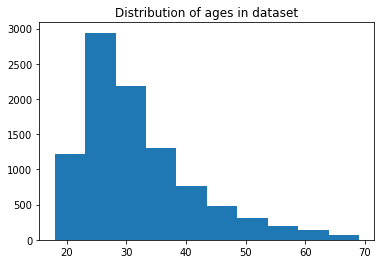

In [10]:
_ = plt.hist(age)
_ = plt.title("Distribution of ages in dataset")

In [11]:
# In most applications, you probably don't need super
# fine precision, i.e., someone's exact age

# Here, we wil "discretize" age into a categorical variable:

# Binary definition; i.e., "is 30 yrs old or younger"
age_30 = (age <= 30)
age_30.head()

53518    False
24790     True
21691     True
18310    False
36621     True
Name: age, dtype: bool

In [12]:
# Categorical definition:

# Define bin boundaries
bins = [0,20,30,40,50,100]

# Use pd.cut function to bin the data
category = pd.cut(age,bins)
age_bins = category.apply(lambda x: str(x))
age_bins.head()

53518    (50, 100]
24790     (20, 30]
21691     (20, 30]
18310     (30, 40]
36621     (20, 30]
Name: age, dtype: category
Categories (5, object): [(0, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 100]]

## The magic: "machine learning"!

In [13]:
# Building a basic logistic regression classifier
# using profile features to predict age

from sklearn.linear_model import LogisticRegression

age_logit = LogisticRegression()
age_logit.fit(profile_features, age_30)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
logit_predictions = pd.DataFrame({
    "prediction": age_logit.predict(profile_features),
    "ground_truth": age_30
})

logit_predictions['correct'] = (logit_predictions.prediction == logit_predictions.ground_truth)
logit_predictions.head(n=10)

,prediction,ground_truth,correct
53518,False,False,True
24790,True,True,True
21691,False,True,False
18310,True,False,False
36621,False,True,False
50834,False,False,True
7486,True,False,False
22184,False,False,True
11898,False,False,True
26979,True,True,True


In [15]:
# We usually think of "True" as 1 and "False" as 0
logit_predictions.astype(int).head()

,prediction,ground_truth,correct
53518,0,0,1
24790,1,1,1
21691,0,1,0
18310,1,0,0
36621,0,1,0


In [16]:
# Evaluate overall accuracy:
logit_accuracy = logit_predictions.correct.mean()
print("Logistic regression accuracy: {:.2f}%".format(logit_accuracy*100))

Logistic regression accuracy: 68.15%


## Model comparison

We'll try making the same prediction, using different machine learning models:

- Logistic regression
- Decision tree
- Random forest

In [17]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

age_logit = LogisticRegression()
age_logit.fit(profile_features, age_30)
round((age_logit.predict(profile_features)==age_30).mean()*100, 2)

68.15

In [18]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

age_dt = DecisionTreeClassifier(max_depth=15, min_samples_leaf=5)
age_dt.fit(profile_features, age_30)
round((age_dt.predict(profile_features)==age_30).mean()*100, 2)

69.83

In [32]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

age_rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=5)
age_rf.fit(profile_features, age_30)
round((age_rf.predict(profile_features)==age_30).mean()*100, 2)

70.77

## A few takeaways:

- Accuracy isn't *amazingly* better using fancy method like random forest
- Fancy ML methods often only shine with truly *big data* (10k, 100k, 1m+ observations)
    - Not common in most organizations (outside Google, FB, Amazon, Twitter, etc.)
    - Lots of news is biased toward breakthroughs at these big comapnies... rarely relevant for business practitioners
- The code to run different algorithms is remarkably similar
    - With tools like Python/SciKit-Learn, ML coding is a commodity!


### Cross-validated Accuracy (skip for class)

If you know what cross-validation is, this is just a short demonstration on how to compare the various models using out-of-sample, cross-validated accuracy measures.

In [20]:
from sklearn.model_selection import cross_validate

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1_macro"
}

logit_clf = LogisticRegression()

scoring_obj = cross_validate(logit_clf, profile_features, age_30, scoring=scoring, cv=5, return_train_score=False)
for sc in scoring.keys():
    print("{: >10}: {:.3f}".format(sc, scoring_obj["test_"+sc].mean()))

  accuracy: 0.668
 precision: 0.683
    recall: 0.713
        f1: 0.664


In [21]:
dt_clf = DecisionTreeClassifier(max_depth=15, min_samples_leaf=5)

scoring_obj = cross_validate(dt_clf, profile_features, age_30, scoring=scoring, cv=5, return_train_score=False)
for sc in scoring.keys():
    print("{: >10}: {:.3f}".format(sc, scoring_obj["test_"+sc].mean()))

  accuracy: 0.634
 precision: 0.653
    recall: 0.683
        f1: 0.630


In [22]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=5)

scoring_obj = cross_validate(rf_clf, profile_features, age_30, scoring=scoring, cv=5, return_train_score=False)
for sc in scoring.keys():
    print("{: >10}: {:.3f}".format(sc, scoring_obj["test_"+sc].mean()))

  accuracy: 0.668
 precision: 0.672
    recall: 0.749
        f1: 0.661


# Part 2: Working with Text and Word Embeddings

How can we improve performance? One idea: use text inputs from user profiles.

In [23]:
dating_data[[c for c in dating_data.columns if c.startswith("essay")]].head()

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
53518,i'm a very lighthearted person. i prefer laugh...,i'm making a point of not dwelling on what i m...,making friends out of strangers. i seem to be ...,my smile.,i prefer books that are about true events and ...,1. my family<br />\n2. food<br />\n3. my compu...,just what to think about.,NaN,it's not very private if you plan on admitting...,if you have read my profile and think we may b...
24790,"i love to travel, check out coffee shops, sals...",meeting people! making the most out of life......,"having an open mind, hosting parties, going wi...",my smile :-),"books- eat pray love, kite runner, homage to c...",music<br />\nphone<br />\ninternet<br />\nhot ...,"what i want to be when i grow up, the world we...",maybe perusing the streets of the city with my...,i like it when it's foggy and raining outside,you define success as happiness.<br />\n<br />...
21691,NaN,working as marketing consultant helping compan...,NaN,my eyes,NaN,"good food, friends, family, books, travel and ...",everything,going to dinner with friends,NaN,you think we have a lot in common and want to ...
18310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,you are cool - no pressure - like to sing - li...
36621,hey! i am sanket. about me? here it goes:<br /...,i am trying to make it worth by having lots of...,well i am good at understanding people. i am g...,you will notice that i am kind of cute (atleas...,dont read books a lot. i like thrillers though...,my family.<br />\nsome of my friends.<br />\nm...,dont waste time in thinking too much. i am kin...,definitely outside my apartment somewhere. i h...,i am going to be a millionaire!,you like what you see... you can be sure\nwhat...


## Using word embeddings on dating profiles

### Pre-processing

Working with text is messy and training vector models can take a long time. I've done essentially all the hard work ahead of time. Details on what I've done:

- Take all text input from users and identify the all the unique words used
- Get embeddings of all words from a pre-trained word-embedding model
    - GloVe, [source here](https://github.com/3Top/word2vec-api#where-to-get-a-pretrained-models)
    - Trained on 6 billion documents from Wikipedia and Gigaword repository
- Average the vector of all the words used by a given user
- Save the output in its own file

Result below:

In [24]:
text_features = pd.read_csv("./dating_data/text_features.csv", index_col=0)
text_features.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,...,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
53518,-0.039890,-0.011629,-0.115810,-0.162340,0.053081,-0.008670,-3.616321,0.156632,-0.019611,-0.438679,0.118975,-0.076947,-0.013487,-0.101833,-0.019616,-0.086686,-0.121745,-0.080735,0.048504,0.049763,0.131275,-0.105713,0.020447,0.073554,-0.075424,...,0.006113,0.117934,0.065010,0.001210,-0.050361,0.557383,-0.057572,0.057571,0.148603,0.006665,0.091429,0.002636,0.082663,-0.079894,-0.046375,0.000297,-0.066259,-0.074132,-0.067182,0.050971,0.042647,-0.043682,-0.060014,0.053473,-0.014896
24790,-0.058771,-0.028866,-0.074170,-0.097341,-0.019257,-0.002513,-2.756003,-0.057133,-0.004204,-0.362555,0.181805,-0.016791,0.018360,0.007097,0.009290,-0.032806,-0.065018,-0.031223,0.044716,0.057883,0.083528,-0.059599,0.001198,-0.034852,-0.027820,...,0.027763,0.072245,-0.034236,-0.005366,-0.052145,0.421351,-0.009506,0.025452,0.096789,0.006431,0.102477,-0.035993,-0.012258,-0.068204,-0.094226,0.039112,-0.092943,-0.058902,-0.027692,0.057158,0.068052,-0.041389,-0.079319,0.047364,0.040582
21691,-0.003954,0.022642,-0.143292,-0.153459,0.069895,0.018823,-3.710687,-0.015625,0.008424,-0.421169,0.083162,-0.018455,0.084521,-0.172999,-0.030102,0.028515,-0.084798,-0.052807,0.047534,0.051549,0.108513,-0.134434,0.021067,0.144914,-0.098754,...,0.020842,0.054697,0.002339,-0.060946,-0.064825,0.382083,-0.086761,0.070038,0.151188,0.011227,0.169332,-0.038040,0.098214,-0.074552,-0.084618,0.026273,-0.082545,-0.095551,-0.042269,0.097790,0.046094,-0.108859,0.055097,0.158306,-0.020009
18310,-0.132708,-0.037007,-0.130888,-0.282670,0.140651,0.141868,-3.496820,0.030340,-0.127458,-0.492044,0.169695,0.318739,-0.108982,-0.024348,-0.114518,-0.035411,-0.187575,0.086961,-0.122467,-0.028496,0.051518,0.115598,-0.028241,0.003536,0.130245,...,-0.079759,0.191102,0.082972,-0.011620,-0.142533,0.615899,-0.177881,0.042016,0.217753,-0.103392,0.147339,0.161117,0.007458,0.007311,-0.119826,0.055219,-0.010782,-0.181100,-0.151574,0.243818,-0.018370,-0.173040,0.039194,0.067409,0.075485
36621,-0.065078,0.007312,-0.098709,-0.137451,0.040789,0.009936,-3.573169,0.050855,0.018114,-0.451926,0.132201,-0.067089,0.079714,-0.086178,-0.021331,-0.087012,-0.115125,-0.034371,0.035369,0.063461,0.126464,-0.106776,0.021112,0.047072,-0.061139,...,0.008626,0.099538,0.079664,0.011097,-0.051886,0.577595,-0.097179,0.069124,0.117998,0.021103,0.103721,0.026685,0.126203,-0.115861,-0.047948,-0.015657,-0.106407,-0.120128,-0.056358,0.052079,0.057502,-0.055104,-0.024685,0.047549,0.020424


In [25]:
# Using embedding of text data to predict age:

age_logit = LogisticRegression()
age_logit.fit(text_features, age_30)
(age_logit.predict(text_features)==age_30).mean()

0.7411446972057755

In [26]:
# What happens if we combine the profile characteristics and text features?

combined_features = np.hstack((text_features.values, profile_features.values))

age_logit = LogisticRegression()
age_logit.fit(combined_features, age_30)
(age_logit.predict(combined_features)==age_30).mean()

0.7643087150721928

In [27]:
# What about using fancy methods with fancy word embeddings?

age_rf = RandomForestClassifier(n_estimators=50, max_depth=40, min_samples_leaf=10)
age_rf.fit(text_features, age_30)
(age_rf.predict(text_features)==age_30).mean()

0.9553339565804508

In [28]:
# BE WARY! This is "in-sample" fit; predictions on "out-of-sample"
# data are actually no better than logistic regression in this case

### Cross-validated accuracy scores (skip for class)

In [29]:
logit_clf = LogisticRegression()
scoring_obj = cross_validate(logit_clf, text_features, age_30, scoring=scoring, cv=5, return_train_score=False)
for sc in scoring.keys():
    print("{: >10}: {:.3f}".format(sc, scoring_obj["test_"+sc].mean()))

  accuracy: 0.725
 precision: 0.730
    recall: 0.775
        f1: 0.721


In [30]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=40, min_samples_leaf=5)

scoring_obj = cross_validate(rf_clf, text_features, age_30, scoring=scoring, cv=5, return_train_score=False)
for sc in scoring.keys():
    print("{: >10}: {:.3f}".format(sc, scoring_obj["test_"+sc].mean()))

  accuracy: 0.724
 precision: 0.710
    recall: 0.824
        f1: 0.716


## Wrapping up

This code ([source](https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook/49199019#49199019)) lists all required packages used in this notebook, making it easy to share this code to run in your own environment.

In [31]:

import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

scikit-learn==0.19.1
pandas==0.23.4
numpy==1.15.0
matplotlib==2.2.3
